In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall_data=pd.read_excel('Data.xlsx')

In [3]:
mall_data.shape

(200, 5)

In [4]:
mall_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
mall_data.rename({"Annual Income (k$)":"Annual Income",
           "Spending Score (1-100)":"Spending Score"},
           axis = 1,
           inplace = True)

In [6]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
mall_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Basic Exploratory Data Analysis

In [9]:
mall_data.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

Text(0.5, 1.0, 'Total gender')

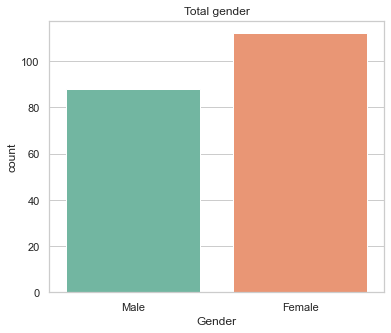

In [10]:
plt.figure(figsize=(6,5))
sns.set_theme(style="whitegrid")
sns.countplot(x='Gender', data=mall_data,palette="Set2")
plt.title('Total gender')

Text(0.5, 1.0, 'Average Age by Gender')

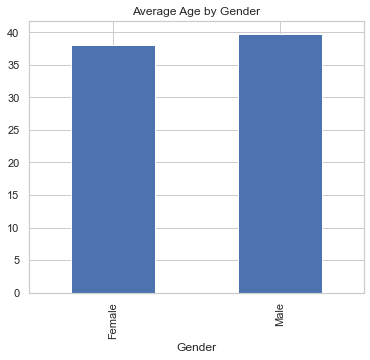

In [11]:
plt.figure(figsize=(6,5))
mall_data['Age'].groupby(mall_data['Gender']).mean().plot(kind='bar')
plt.title('Average Age by Gender')

Text(0.5, 1.0, 'Average income and Spending Score by Gender')

<Figure size 432x360 with 0 Axes>

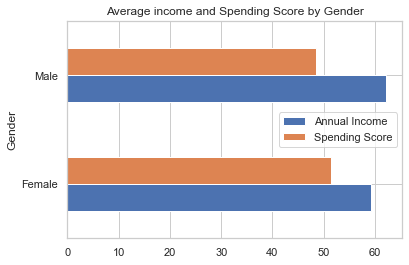

In [12]:
plt.figure(figsize=(6,5))
mall_data.groupby('Gender').agg({'Annual Income':'mean','Spending Score': 'mean'}).plot(kind='barh',rot=0)
plt.title('Average income and Spending Score by Gender')


Text(0.5, 1.0, 'Age Distribution')

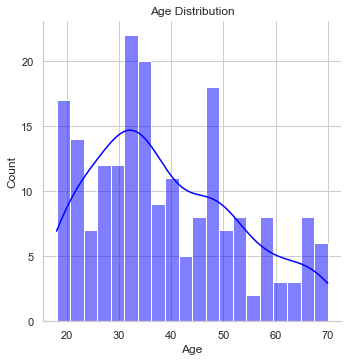

In [75]:
sns.set_style('whitegrid')
sns.displot(mall_data['Age'],kde = True, color ='blue', bins = 20,palette="Set3")
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income Distribution')

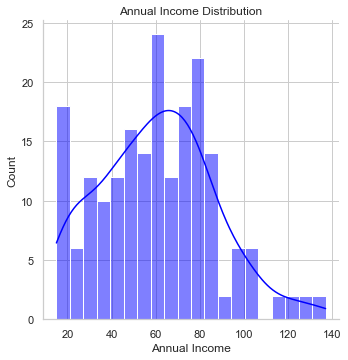

In [76]:
sns.set_style('whitegrid')
sns.displot(mall_data['Annual Income'],kde = True, color ='blue', bins = 20,palette="Set3")
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

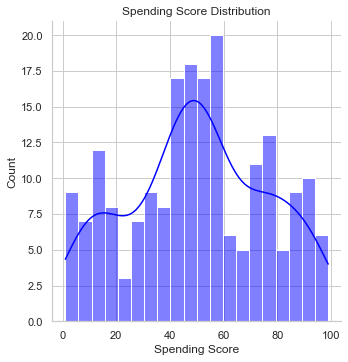

In [77]:
sns.set_style('whitegrid')
sns.displot(mall_data['Spending Score'],kde = True, color ='blue', bins = 20,palette="Set3")
plt.title('Spending Score Distribution')

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

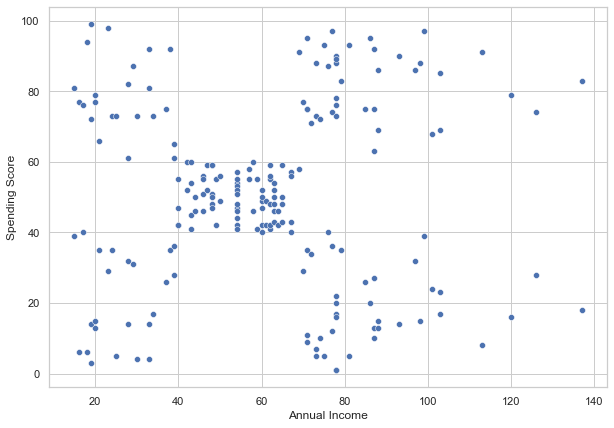

In [99]:
sns.scatterplot(x=mall_data['Annual Income'],y=mall_data['Spending Score'])

<AxesSubplot:xlabel='Age', ylabel='Spending Score'>

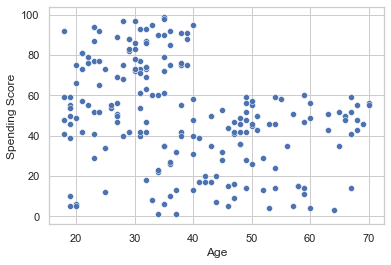

In [100]:
sns.scatterplot(x=mall_data['Age'],y=mall_data['Spending Score'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income'>

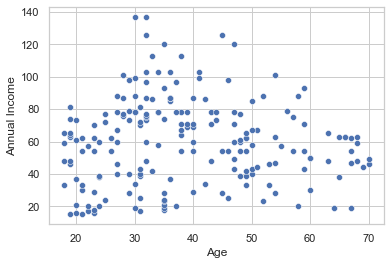

In [101]:
sns.scatterplot(x=mall_data['Age'],y=mall_data['Annual Income'])

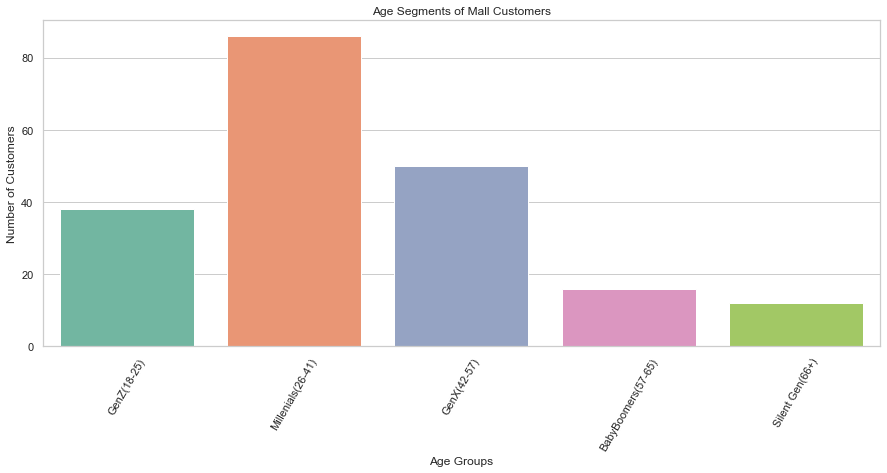

In [13]:
GenZ_18_25=mall_data.Age[(mall_data.Age >= 18) & (mall_data.Age <= 25)]
Millenials_26_41=mall_data.Age[(mall_data.Age >= 26) & (mall_data.Age <= 41)]
GenX_42_57=mall_data.Age[(mall_data.Age >= 42) & (mall_data.Age <= 57)]
Baby_Boomers_57_65=mall_data.Age[(mall_data.Age >= 57) & (mall_data.Age <= 65)]
Silend_Gen_66_above=mall_data.Age[(mall_data.Age >= 66)]

age_segx = ['GenZ(18-25)','Millenials(26-41)','GenX(42-57)','BabyBoomers(57-65)','Silent Gen(66+)']
age_segy = [len(GenZ_18_25),len(Millenials_26_41),len(GenX_42_57),len(Baby_Boomers_57_65),len(Silend_Gen_66_above)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_segx,y=age_segy,palette='Set2')
plt.xticks(rotation=60)
plt.title('Age Segments of Mall Customers')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.show()

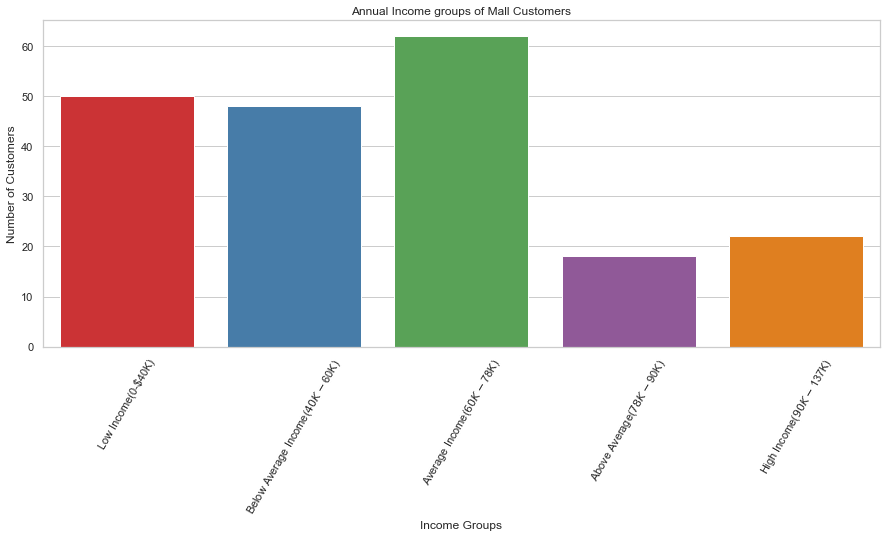

In [14]:
Low_income_0_40=mall_data['Annual Income'][(mall_data['Annual Income'] >= 0) & 
                                           (mall_data['Annual Income'] <= 40)]
Below_Average_income_41_60=mall_data['Annual Income'][(mall_data['Annual Income'] >= 41) & 
                                           (mall_data['Annual Income'] <= 60)]
Average_income_61_78=mall_data['Annual Income'][(mall_data['Annual Income'] >= 61) & 
                                           (mall_data['Annual Income'] <= 78)]
Above_Average_income_79_90=mall_data['Annual Income'][(mall_data['Annual Income'] >= 79) & 
                                           (mall_data['Annual Income'] <= 90)]
High_income_91_137=mall_data['Annual Income'][(mall_data['Annual Income'] >= 91) & 
                                           (mall_data['Annual Income'] <= 137)]

income_segx = ['Low Income(0-$40K)','Below Average Income($40K-$60K)','Average Income($60K-$78K)'
            ,'Above Average($78K-$90K)','High Income($90K-$137K)']
income_segy = [len(Low_income_0_40),len(Below_Average_income_41_60),len(Average_income_61_78),len(Above_Average_income_79_90),len(High_income_91_137)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_segx,y=income_segy,palette='Set1')
plt.xticks(rotation=60)
plt.title('Annual Income groups of Mall Customers')
plt.xlabel('Income Groups')
plt.ylabel('Number of Customers')
plt.show()

In [15]:
mall_data['Spending Score'].quantile([0.20,0.40,0.60,0.80,1])

0.2    26.0
0.4    45.6
0.6    55.0
0.8    75.0
1.0    99.0
Name: Spending Score, dtype: float64

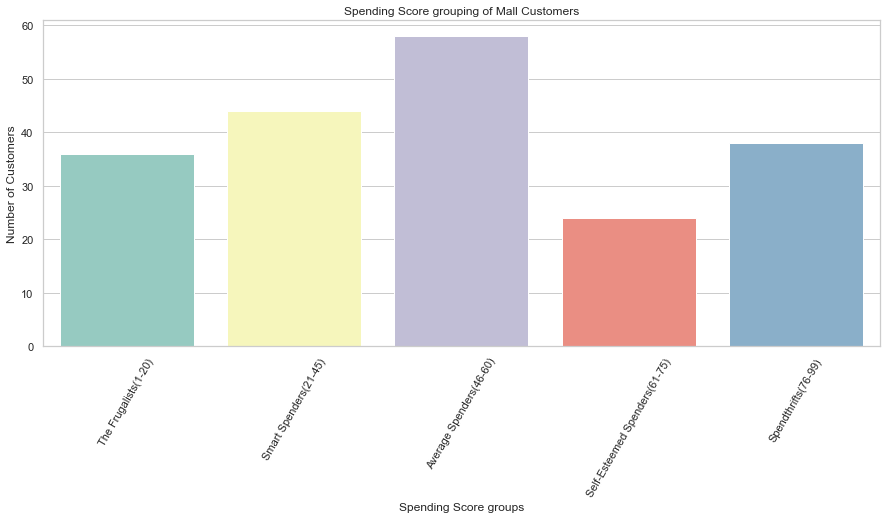

In [16]:
The_Frugalists_1_20=mall_data['Spending Score'][(mall_data['Spending Score'] >= 1) & 
                                           (mall_data['Spending Score'] <= 20)]
Smart_Spenders_21_45=mall_data['Spending Score'][(mall_data['Spending Score'] >= 21) & 
                                           (mall_data['Spending Score'] <= 45)]
Average_Spenders_46_60=mall_data['Spending Score'][(mall_data['Spending Score'] >= 46) & 
                                           (mall_data['Spending Score'] <= 60)]
Self_Esteemed_Spenders_61_75=mall_data['Spending Score'][(mall_data['Spending Score'] >= 61) & 
                                           (mall_data['Spending Score'] <= 75)]
Spendthrifts_76_99=mall_data['Spending Score'][(mall_data['Spending Score'] >= 76) & 
                                           (mall_data['Spending Score'] <= 99)]

spending_segx = ['The Frugalists(1-20)','Smart Spenders(21-45)','Average Spenders(46-60)'
            ,'Self-Esteemed Spenders(61-75)','Spendthrifts(76-99)']
spending_segy = [len(The_Frugalists_1_20),len(Smart_Spenders_21_45),len(Average_Spenders_46_60),len(Self_Esteemed_Spenders_61_75),len(Spendthrifts_76_99)]

plt.figure(figsize=(15,6))
sns.barplot(x=spending_segx,y=spending_segy,palette='Set3')
plt.xticks(rotation=60)
plt.title('Spending Score grouping of Mall Customers')
plt.xlabel('Spending Score groups')
plt.ylabel('Number of Customers')
plt.show()

Model building

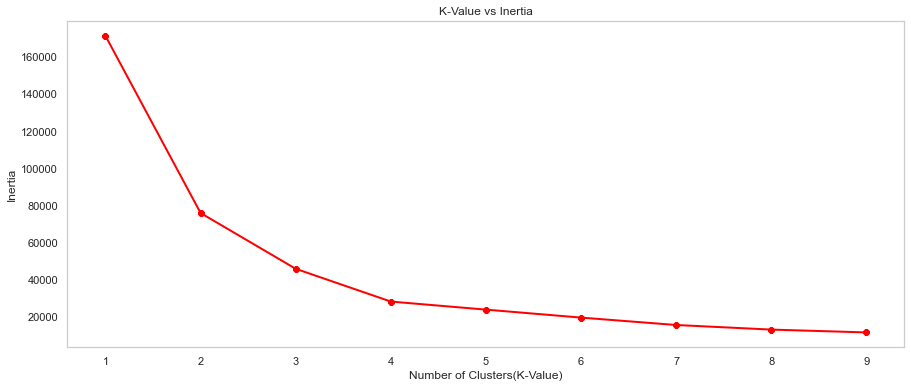

In [21]:
X1 = mall_data.loc[:,['Age','Spending Score']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,10),wcss,linewidth=2,color='red',marker='8')
plt.title('K-Value vs Inertia')
plt.xlabel('Number of Clusters(K-Value)')
plt.ylabel('Inertia')

plt.show()

<ipython-input-20-2080278b298b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'] = labels


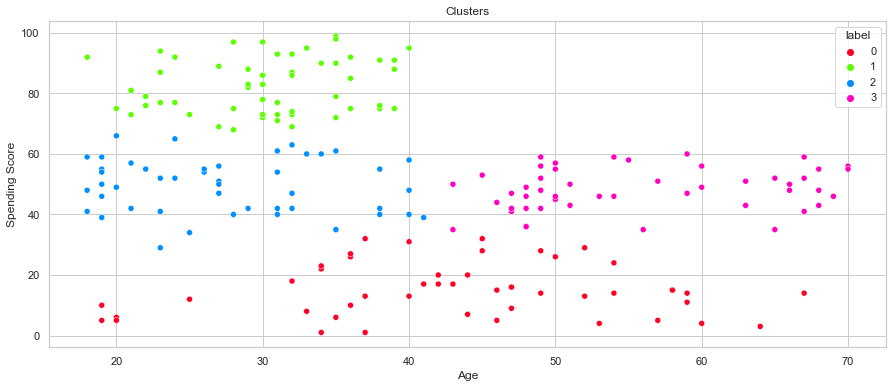

In [20]:
model = KMeans(n_clusters=4, max_iter=300, tol=0.0001, random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
new_data = mall_data[['Age','Spending Score']].iloc[:,:]
new_data['label'] = labels

_, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=new_data,x='Age',y='Spending Score',hue='label',palette='gist_rainbow')
ax.set_title('Clusters')
plt.show()

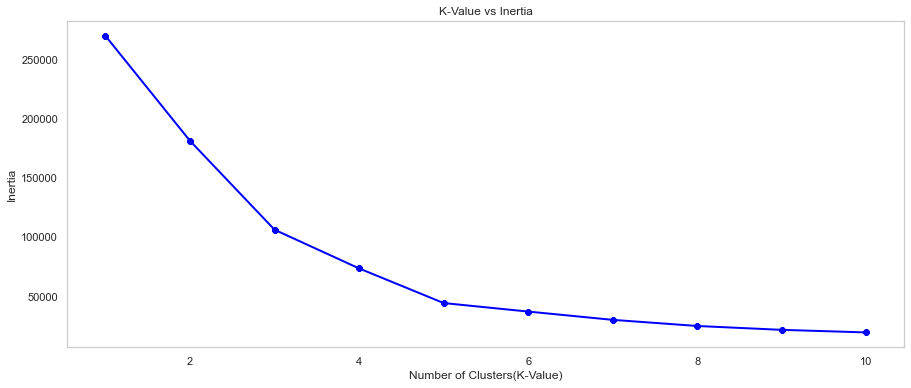

In [26]:
X1 = mall_data.loc[:,['Annual Income','Spending Score']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.title('K-Value vs Inertia')
plt.xlabel('Number of Clusters(K-Value)')
plt.ylabel('Inertia')

plt.show()

<ipython-input-74-38d856719373>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'] = labels


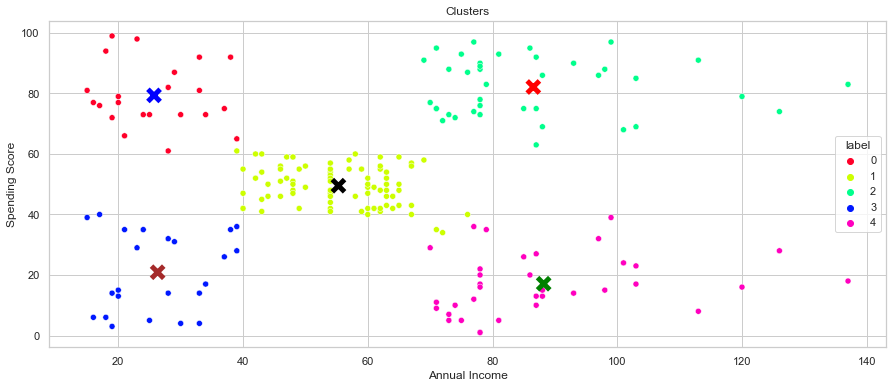

In [74]:
model = KMeans(n_clusters=5, max_iter=300, tol=0.0001, random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
new_data = mall_data[['CustomerID','Age','Gender','Annual Income','Spending Score']].iloc[:,:]
new_data['label'] = labels
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

_, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(data=new_data,x='Annual Income',y='Spending Score',hue='label',palette='gist_rainbow')
plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c=['blue','black','red','brown','green'])
ax.set_title('Clusters')
plt.show()

In [65]:
new_data.to_excel("output.xlsx",sheet_name='Segmented_data')  